In [188]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from argparse import ArgumentParser
# povolene jsou pouze zakladni knihovny (os, sys) a knihovny numpy, matplotlib a argparse

from download import DataDownloader


def plot_stat(data_source,
              fig_location=None,
              show_figure=False):
    pass


# TODO pri spusteni zpracovat argumenty
if __name__ == "__main__":
    parser = ArgumentParser()
    parser.add_argument("--fig_location",
                        help="Ak zadany, tak sa ulozi obrazok do zadanej cesty")
    parser.add_argument("--show_figure", help="Ak zadany, tak sa zobrazi graf",
        action="store_true", default=False)
#     args = parser.parse_args(["--fig_location"])
#     zavolanie funkcie get_stat
    data = DataDownloader().get_dict()


Pracujem na tomto regione = PHA
	Otvaranie gzip filu 'data\data_PHA.pkl.gz': 0.5197s
	Ukladanaie do vys. slovnika: 0.0600s
	Loop 1 regionu: 0.5817s
Pracujem na tomto regione = STC
	Otvaranie gzip filu 'data\data_STC.pkl.gz': 0.3791s
	Ukladanaie do vys. slovnika: 0.1220s
	Loop 1 regionu: 0.5010s
Pracujem na tomto regione = JHC
	Otvaranie gzip filu 'data\data_JHC.pkl.gz': 0.1120s
	Ukladanaie do vys. slovnika: 0.1489s
	Loop 1 regionu: 0.2619s
Pracujem na tomto regione = PLK
	Otvaranie gzip filu 'data\data_PLK.pkl.gz': 0.1080s
	Ukladanaie do vys. slovnika: 0.1700s
	Loop 1 regionu: 0.2780s
Pracujem na tomto regione = ULK
	Otvaranie gzip filu 'data\data_ULK.pkl.gz': 0.2608s
	Ukladanaie do vys. slovnika: 0.1761s
	Loop 1 regionu: 0.4450s
Pracujem na tomto regione = HKK
	Otvaranie gzip filu 'data\data_HKK.pkl.gz': 0.1240s
	Ukladanaie do vys. slovnika: 0.1960s
	Loop 1 regionu: 0.3200s
Pracujem na tomto regione = JHM
	Otvaranie gzip filu 'data\data_JHM.pkl.gz': 0.1880s
	Ukladanaie do vys. slovnik

In [388]:


regions = np.unique(data["region"])
absolut = np.empty(shape=(len(regions), 6) ,dtype = 'f')

for i, region in enumerate(regions):
    
    indexes = np.where(data["region"] == region)
    sums = [
            np.sum(data["p24"][indexes] == 1),
            np.sum(data["p24"][indexes] == 2),
            np.sum(data["p24"][indexes] == 3),
            np.sum(data["p24"][indexes] == 4),
            np.sum(data["p24"][indexes] == 5),
            np.sum(data["p24"][indexes] == 0)
           ]
    absolut[i] = sums
    
absolut = np.transpose(absolut)
relative = absolut.copy()
absolut[absolut == 0] = np.nan
relative = np.transpose(np.transpose(relative) / np.transpose(np.sum(relative, axis=1))) * 100
relative[relative == 0] = np.nan

[]

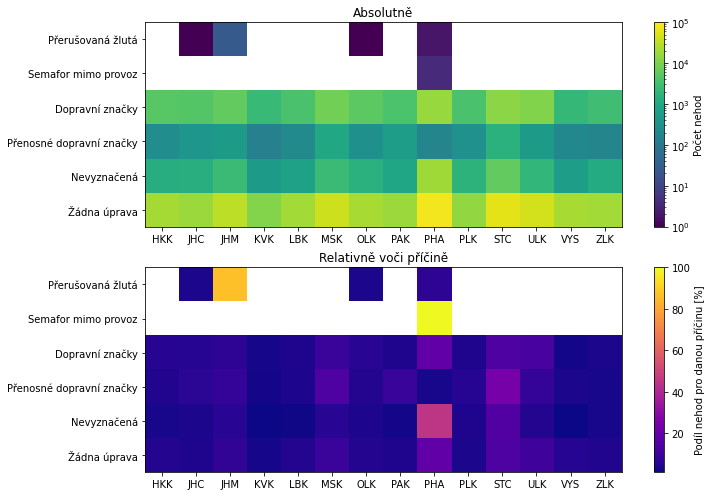

In [395]:
from matplotlib.colors import LogNorm
fig = plt.figure(figsize=(11.69, 8.27 ))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.set_title("Absolutně")

ax1.xaxis.set_ticks(range(0,len(regions)))
ax1.xaxis.set_ticklabels(regions)
ax1.yaxis.set_ticks(range(0,6))
ax1.yaxis.set_ticklabels([
    "Přerušovaná žlutá",
    "Semafor mimo provoz",
    "Dopravní značky",
    "Přenosné dopravní značky",
    "Nevyznačená",
    "Žádna úprava",
])

ai1 = ax1.imshow(absolut, norm=LogNorm(1,1e5))
cbar = fig.colorbar(ai1, ax=ax1)
cbar.set_label("Počet nehod")

ax1.plot()


ax2.set_title("Relativně voči příčině")

ax2.xaxis.set_ticks(range(0,len(regions)))
ax2.xaxis.set_ticklabels(regions)
ax2.yaxis.set_ticks(range(0,6))
ax2.yaxis.set_ticklabels([
    "Přerušovaná žlutá",
    "Semafor mimo provoz",
    "Dopravní značky",
    "Přenosné dopravní značky",
    "Nevyznačená",
    "Žádna úprava",
])

ai2 = ax2.imshow(relative, cmap="plasma")
cbar = fig.colorbar(ai2, ax=ax2)
cbar.set_label("Podíl nehod pro danou příčinu [%]")

ax2.plot()


'/kokot/kokot/ano'